# 3/ Làm tương tự và apply thử cho dữ liệu khác là cat and dog trong file đính kèm  

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import *
from keras.applications.vgg16 import VGG16

import pickle
import cv2
sns.set_style("darkgrid")

In [ ]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:



def predict_vgg(test_img):

    test_img = cv2.resize(test_img,(150,150))
    test_input = test_img.reshape((1,150,150,3))

    predictions_vgg = vgg.predict(test_input)

    if predictions_vgg[0][0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")

    plt.imshow(test_img)
    plt.show()

In [ ]:
conv_base = VGG16(weights = "imagenet",
                 include_top = False,     # removing FC Layers
                 input_shape = (150,150,3)
                 )

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg = Sequential()

vgg.add(conv_base)
vgg.add(Flatten())


vgg.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))


vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [ ]:
conv_base.trainable = False

<div class = "alert alert-success">
    <h4>Data Augmentation</h4>
</div>

In [ ]:
batch_size = 32

train_dg = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)
test_dg = ImageDataGenerator(rescale = 1./255)

train_gen = train_dg.flow_from_directory('/kaggle/input/dogs-vs-cats/train',
                                        target_size = (150,150),
                                        batch_size = batch_size,
                                        class_mode = "binary")

test_gen = test_dg.flow_from_directory('/kaggle/input/dogs-vs-cats/test',
                                        target_size = (150,150),
                                        batch_size = batch_size,
                                        class_mode = "binary")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
vgg.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history2 = vgg.fit_generator(train_gen,
                            epochs=20,
                            validation_data = test_gen)

Epoch 1/20
625/625 [==============================] - 174s 270ms/step - loss: 0.3634 - accuracy: 0.8388 - val_loss: 0.2498 - val_accuracy: 0.9044
Epoch 2/20
625/625 [==============================] - 170s 272ms/step - loss: 0.2732 - accuracy: 0.8852 - val_loss: 0.2281 - val_accuracy: 0.9098
Epoch 3/20
625/625 [==============================] - 168s 269ms/step - loss: 0.2457 - accuracy: 0.8978 - val_loss: 0.2024 - val_accuracy: 0.9102
Epoch 4/20
625/625 [==============================] - 171s 274ms/step - loss: 0.2337 - accuracy: 0.9014 - val_loss: 0.1962 - val_accuracy: 0.9144
Epoch 5/20
625/625 [==============================] - 171s 274ms/step - loss: 0.2224 - accuracy: 0.9057 - val_loss: 0.2154 - val_accuracy: 0.9080
Epoch 6/20
625/625 [==============================] - 170s 273ms/step - loss: 0.2166 - accuracy: 0.9103 - val_loss: 0.2021 - val_accuracy: 0.9118
Epoch 7/20
625/625 [==============================] - 172s 275ms/step - loss: 0.2126 - accuracy: 0.9136 - val_loss: 0.1976 -

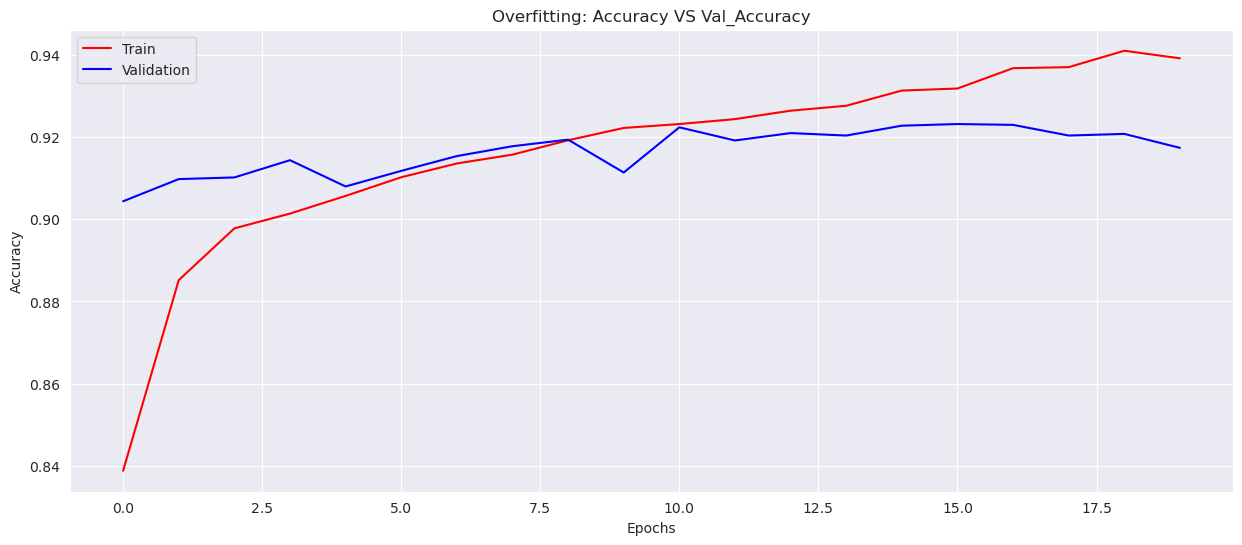

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history2.history["accuracy"],color = "red",label = "Train")
plt.plot(history2.history["val_accuracy"],color = "blue", label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Overfitting: Accuracy VS Val_Accuracy")
plt.legend()
plt.show()


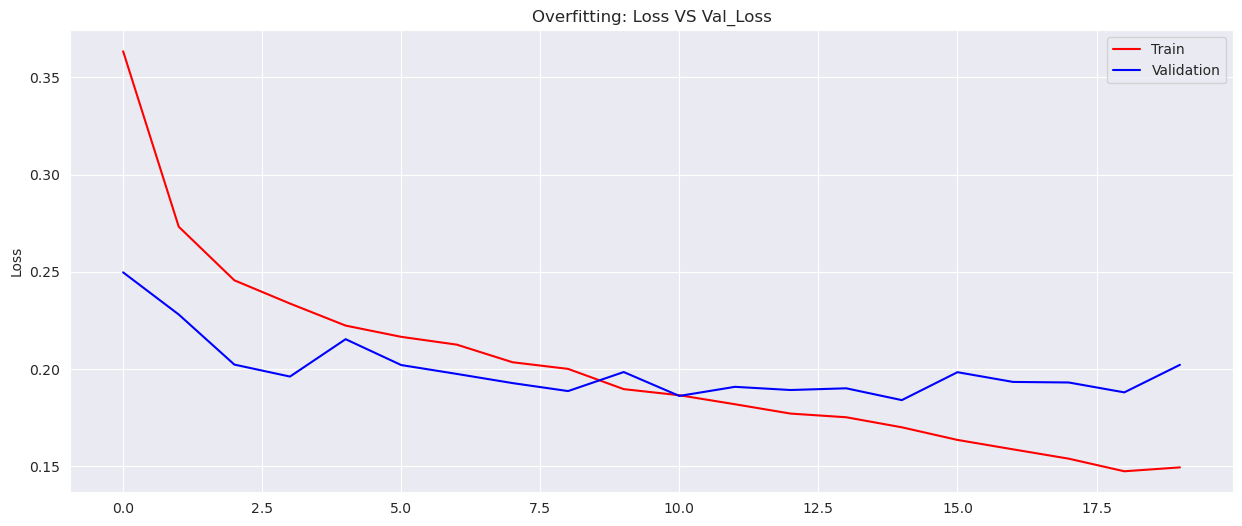

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history2.history["loss"],color = "red",label = "Train")
plt.plot(history2.history["val_loss"],color = "blue", label = "Validation")
plt.ylabel("Loss")
plt.title("Overfitting: Loss VS Val_Loss")
plt.legend()
plt.show()



1/1 [==============================] - 1s 746ms/step
Prediction: Cat


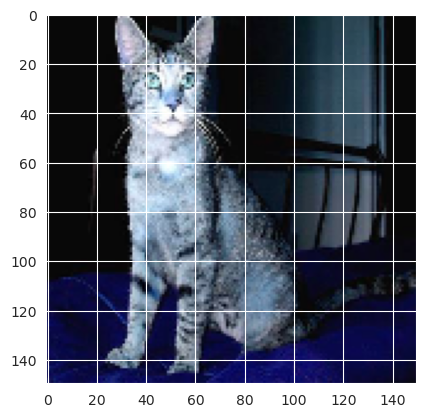

In [ ]:
test_img = cv2.imread('/kaggle/input/dogs-vs-cats/test/cats/cat.10000.jpg')  # cat image new data
predict_vgg(test_img)

1/1 [==============================] - 0s 20ms/step
Prediction: Dog


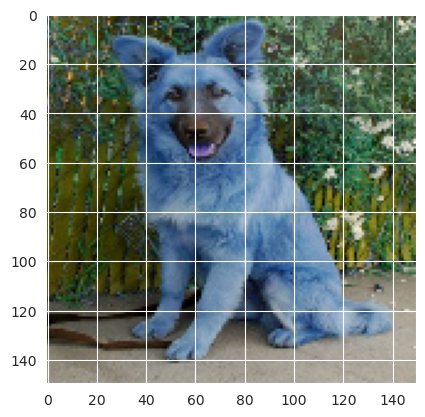

In [ ]:
test_img = cv2.imread('/kaggle/input/dogs-vs-cats/test/dogs/dog.10014.jpg')  # dog image new data
predict_vgg(test_img)

<div class = "alert alert-success">
    <h3>Perfect!!!</h3>
    <ui><li> Predicting Both Classes</li></ui>
</div>

In [ ]:
import pickle
from keras.models import load_model

with open('trained_model.pickle', 'wb') as f:
    pickle.dump(vgg, f)

vgg.save('trained_model.h5')
